# Graphical Model Example

---

Grama maintains a *directed acyclic graph* inside each model; this enables a visual depiction of the model's structure.

In [1]:
import grama as gr

A simple function will just show us the mapping from inputs to outputs.

In [2]:
md0 = gr.Model("Test") >> \
    gr.cp_function(
        fun=lambda x: gr.sin(x[0]) + gr.cos(x[1]),
        var=2,
        out=1
    )

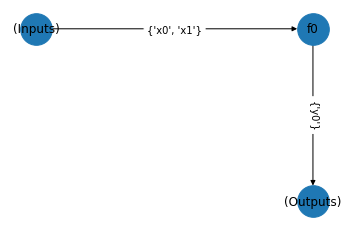

In [3]:
md0.show_dag()

However, we can use functions to generate intermediate values, which can be used by later functions.

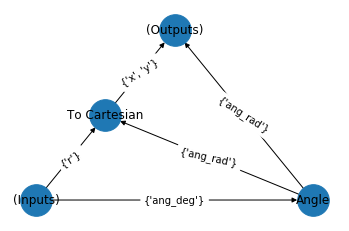

In [4]:
md1 = gr.Model("Polar to Cartesian") >> \
    gr.cp_function(
        fun=lambda ang_deg: ang_deg * 180 / 3.14,
        var=["ang_deg"],
        out=["ang_rad"],
        name="Angle"
    ) >> \
    gr.cp_function(
        fun=lambda r, ang_rad: [r * gr.cos(ang_rad), r * gr.sin(ang_rad)],
        var=["r", "ang_rad"],
        out=["x", "y"],
        name="To Cartesian"
    )

md1.show_dag()

This graphical depiction of the model structure can be helpful to see the dependencies between model components. This is especially useful when there are a lot of submodels, as in the following example.

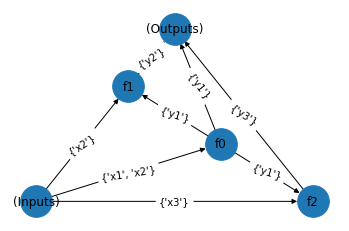

In [5]:
md2 = gr.Model("Test") >> \
    gr.cp_function(
        lambda x1, x2: x1 + x2,
        var=["x1", "x2"],
        out=["y1"]
    ) >> \
    gr.cp_function(
        lambda x2, y1: x2 + y1,
        var=["x2", "y1"],
        out=["y2"]
    ) >> \
    gr.cp_function(
        lambda x3, y1: x3 + y1,
        var=["x3", "y1"],
        out=["y3"]
    )
md2.show_dag()    